In [2]:
%matplotlib widget 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
#import scikit_learn as sklearn

In [3]:
import agent_based_model

In [4]:
txns = pd.read_csv('./txns_list.csv')
txns['time'] = txns.timestep_to_time.apply(pd.to_datetime)
txns.dtypes

timestep                     int64
timestep_to_time            object
sender_id                    int64
receiver_id                  int64
sender_type                 object
amount                     float64
time                datetime64[ns]
dtype: object

In [5]:
txns.timestep

0       54
1       65
2       51
3       34
4       68
        ..
1940    85
1941    87
1942    88
1943    89
1944    92
Name: timestep, Length: 1945, dtype: int64

# define X

In [6]:
from sklearn.cluster import KMeans

In [7]:
X = txns.time.to_numpy().reshape(-1,1)
X = txns.timestep.to_numpy().reshape(-1,1)
X.shape

(1945, 1)

In [8]:
Xdeg2 = np.hstack((X, X**2))

(array([ 16.,   2.,  11.,  96., 520., 620., 465., 127.,  52.,  36.]),
 array([ 1. , 10.5, 20. , 29.5, 39. , 48.5, 58. , 67.5, 77. , 86.5, 96. ]),
 <BarContainer object of 10 artists>)

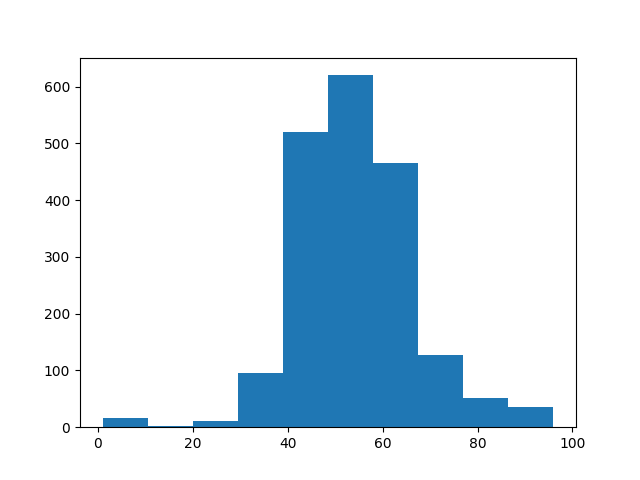

In [9]:
plt.hist(X)

In [10]:
X.shape

(1945, 1)

In [11]:
txns.timestep

0       54
1       65
2       51
3       34
4       68
        ..
1940    85
1941    87
1942    88
1943    89
1944    92
Name: timestep, Length: 1945, dtype: int64

In [12]:
txns.iloc[:15]

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time
0,54,2022-10-31 13:30:00,1,378,normal,-5130.963272,2022-10-31 13:30:00
1,65,2022-10-31 16:15:00,1,295,normal,-5391.946528,2022-10-31 16:15:00
2,51,2022-10-31 12:45:00,2,590,normal,-5104.439404,2022-10-31 12:45:00
3,34,2022-10-31 08:30:00,3,827,normal,-5098.651905,2022-10-31 08:30:00
4,68,2022-10-31 17:00:00,4,1009,normal,-5296.373698,2022-10-31 17:00:00
5,53,2022-10-31 13:15:00,5,547,normal,-1431.333681,2022-10-31 13:15:00
6,42,2022-10-31 10:30:00,6,798,normal,-4957.573361,2022-10-31 10:30:00
7,53,2022-10-31 13:15:00,6,28,normal,-4918.865027,2022-10-31 13:15:00
8,45,2022-10-31 11:15:00,7,949,normal,-5306.786428,2022-10-31 11:15:00
9,50,2022-10-31 12:30:00,7,1009,normal,-5681.004050,2022-10-31 12:30:00


In [32]:
print('mean time', txns[txns.sender_type=='normal'].time.mean())
print('mean time', txns[txns.sender_type=='suspicious'].time.mean())
txns.sender_type.value_counts()

mean time 2022-10-31 13:17:14.806034432
mean time 2022-10-31 17:20:23.595505664


normal        1856
suspicious      89
Name: sender_type, dtype: int64

In [33]:
txns.dtypes

timestep                     int64
timestep_to_time            object
sender_id                    int64
receiver_id                  int64
sender_type                 object
amount                     float64
time                datetime64[ns]
y_true                       int64
y_pred                       int64
dtype: object

In [34]:
txns
# TODO: one class SVM

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true,y_pred
0,54,2022-10-31 13:30:00,1,378,normal,-5130.963272,2022-10-31 13:30:00,0,1
1,65,2022-10-31 16:15:00,1,295,normal,-5391.946528,2022-10-31 16:15:00,0,1
2,51,2022-10-31 12:45:00,2,590,normal,-5104.439404,2022-10-31 12:45:00,0,1
3,34,2022-10-31 08:30:00,3,827,normal,-5098.651905,2022-10-31 08:30:00,0,-1
4,68,2022-10-31 17:00:00,4,1009,normal,-5296.373698,2022-10-31 17:00:00,0,1
...,...,...,...,...,...,...,...,...,...
1940,85,2022-10-31 21:15:00,1010,1006,suspicious,-1403.180260,2022-10-31 21:15:00,1,-1
1941,87,2022-10-31 21:45:00,1010,1001,suspicious,-1367.083779,2022-10-31 21:45:00,1,-1
1942,88,2022-10-31 22:00:00,1010,1009,suspicious,-867.571129,2022-10-31 22:00:00,1,-1
1943,89,2022-10-31 22:15:00,1010,1006,suspicious,-760.731586,2022-10-31 22:15:00,1,-1


# y-true

In [16]:
#txns['y_true'] = [0 if txn.sender_type=='normal' else 1 for txn in txns]
txns['y_true'] = txns.sender_type.apply(lambda x: 1 if x=='suspicious' else 0)
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true
0,54,2022-10-31 13:30:00,1,378,normal,-5130.963272,2022-10-31 13:30:00,0
1,65,2022-10-31 16:15:00,1,295,normal,-5391.946528,2022-10-31 16:15:00,0
2,51,2022-10-31 12:45:00,2,590,normal,-5104.439404,2022-10-31 12:45:00,0
3,34,2022-10-31 08:30:00,3,827,normal,-5098.651905,2022-10-31 08:30:00,0
4,68,2022-10-31 17:00:00,4,1009,normal,-5296.373698,2022-10-31 17:00:00,0
...,...,...,...,...,...,...,...,...
1940,85,2022-10-31 21:15:00,1010,1006,suspicious,-1403.180260,2022-10-31 21:15:00,1
1941,87,2022-10-31 21:45:00,1010,1001,suspicious,-1367.083779,2022-10-31 21:45:00,1
1942,88,2022-10-31 22:00:00,1010,1009,suspicious,-867.571129,2022-10-31 22:00:00,1
1943,89,2022-10-31 22:15:00,1010,1006,suspicious,-760.731586,2022-10-31 22:15:00,1


## kmeans

## Gaussian Mixture

[54]
(1945, 1)


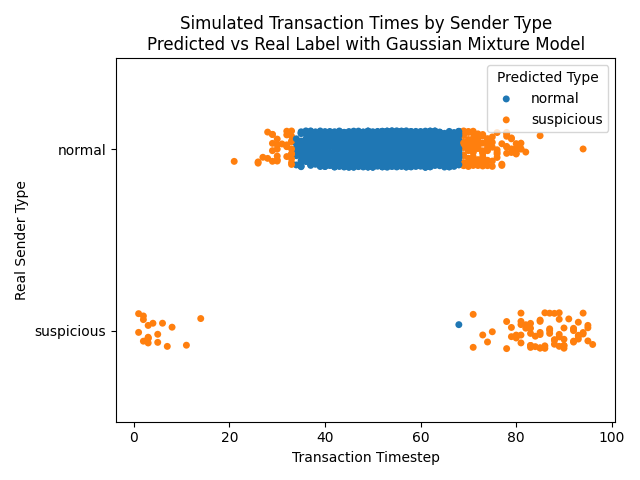

In [17]:
from sklearn import mixture
print(X[0])
print(X.shape)

y_pred = KMeans(
        n_clusters=2
    ).fit_predict(X)


fig, ax = plt.subplots()
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
y_pred = clf.fit_predict(X)

txns['y_pred'] = y_pred
np.random.seed(123)
sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', )
plt.title('Simulated Transaction Times by Sender Type\nPredicted vs Real Label with Gaussian Mixture Model')
plt.ylabel('Real Sender Type')
plt.xlabel('Transaction Timestep')
plt.legend(title='Predicted Type', labels=['normal','suspicious'])
plt.tight_layout()
plt.show()

In [18]:
print(txns.y_pred.value_counts())
print(txns.y_true.value_counts())

0    1708
1     237
Name: y_pred, dtype: int64
0    1856
1      89
Name: y_true, dtype: int64


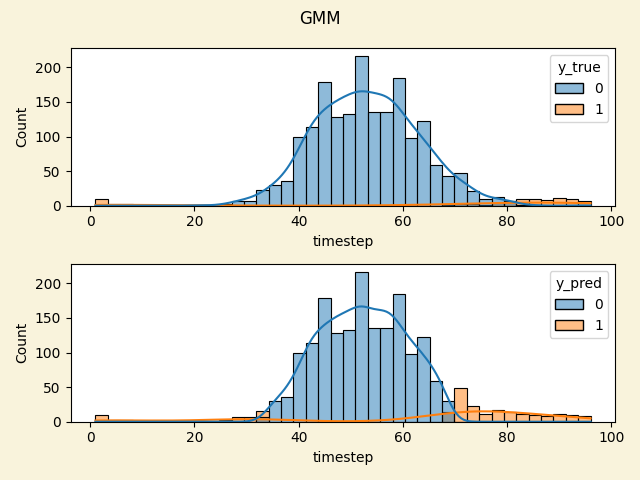

In [19]:
fig, axes = plt.subplots(2,1)
plt.suptitle('GMM')
sns.histplot(data=txns, x='timestep', kde=True, hue='y_true', ax=axes[0])
sns.histplot(data=txns, x='timestep', kde=True, hue='y_pred')
fig.patch.set_facecolor('#F9F3DC')
plt.tight_layout()
plt.show()

In [20]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true,y_pred
0,54,2022-10-31 13:30:00,1,378,normal,-5130.963272,2022-10-31 13:30:00,0,0
1,65,2022-10-31 16:15:00,1,295,normal,-5391.946528,2022-10-31 16:15:00,0,0
2,51,2022-10-31 12:45:00,2,590,normal,-5104.439404,2022-10-31 12:45:00,0,0
3,34,2022-10-31 08:30:00,3,827,normal,-5098.651905,2022-10-31 08:30:00,0,0
4,68,2022-10-31 17:00:00,4,1009,normal,-5296.373698,2022-10-31 17:00:00,0,0
...,...,...,...,...,...,...,...,...,...
1940,85,2022-10-31 21:15:00,1010,1006,suspicious,-1403.180260,2022-10-31 21:15:00,1,1
1941,87,2022-10-31 21:45:00,1010,1001,suspicious,-1367.083779,2022-10-31 21:45:00,1,1
1942,88,2022-10-31 22:00:00,1010,1009,suspicious,-867.571129,2022-10-31 22:00:00,1,1
1943,89,2022-10-31 22:15:00,1010,1006,suspicious,-760.731586,2022-10-31 22:15:00,1,1


In [21]:
# group by node id? and then add in and out degrees? and number of tranasactions / transaction times? 
# each transaction time could be a feature... but how to do it... one hot encoding?
# or just... mean timestep and stddev?


 

## confusion matrix

[[1707  149]
 [   1   88]]
accuracy:  0.922879177377892
mcc:  0.5803408014706942
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1856
           1       0.37      0.99      0.54        89

    accuracy                           0.92      1945
   macro avg       0.69      0.95      0.75      1945
weighted avg       0.97      0.92      0.94      1945



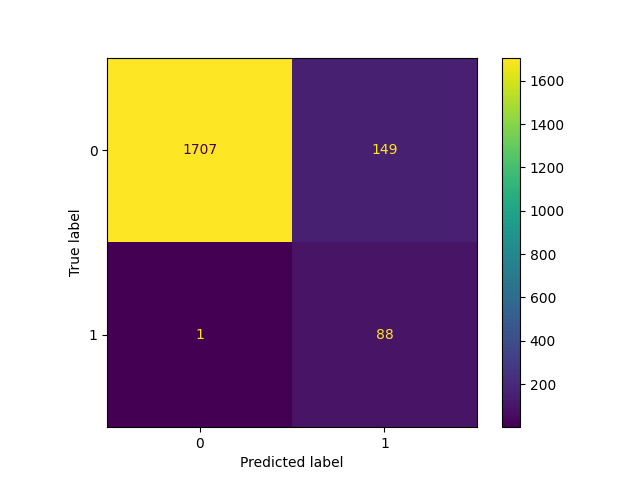

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score 
from sklearn.metrics import matthews_corrcoef 
c_matrix = confusion_matrix(txns.y_true, txns.y_pred)
print(c_matrix)
print('accuracy: ', accuracy_score(txns.y_true, txns.y_pred))
print('mcc: ', matthews_corrcoef(txns.y_true, txns.y_pred))
print(classification_report(txns.y_true, txns.y_pred))
ConfusionMatrixDisplay(c_matrix).plot()


In [23]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [115]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true,y_pred
0,35,2022-10-31 08:45:00,1,622,normal,-2570.593062,2022-10-31 08:45:00,0,1
1,49,2022-10-31 12:15:00,1,842,normal,-6018.117687,2022-10-31 12:15:00,0,1
2,61,2022-10-31 15:15:00,1,1003,normal,-2471.066399,2022-10-31 15:15:00,0,1
3,42,2022-10-31 10:30:00,2,704,normal,-2077.215731,2022-10-31 10:30:00,0,1
4,52,2022-10-31 13:00:00,2,564,normal,-3386.779747,2022-10-31 13:00:00,0,1
...,...,...,...,...,...,...,...,...,...
1930,80,2022-10-31 20:00:00,1010,1004,suspicious,-913.295141,2022-10-31 20:00:00,1,0
1931,82,2022-10-31 20:30:00,1010,1003,suspicious,-606.674136,2022-10-31 20:30:00,1,0
1932,87,2022-10-31 21:45:00,1010,1003,suspicious,-1367.083779,2022-10-31 21:45:00,1,0
1933,91,2022-10-31 22:45:00,1010,1010,suspicious,-854.625186,2022-10-31 22:45:00,1,0


# kmeans

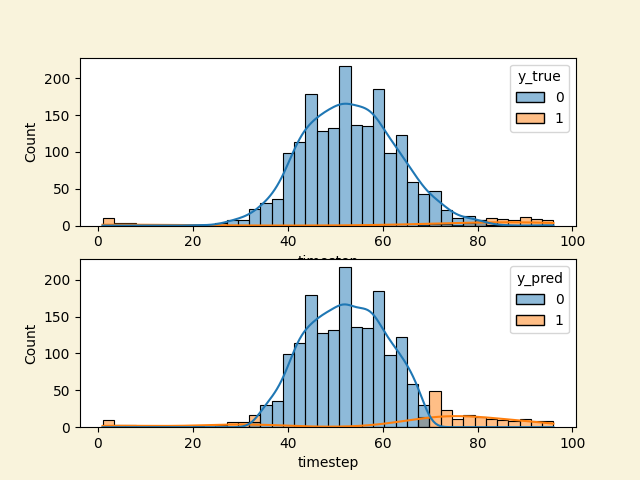

In [24]:
fig, axes = plt.subplots(2,1)
sns.histplot(data=txns, x='timestep', kde=True, hue='y_true', ax=axes[0])
sns.histplot(data=txns, x='timestep', kde=True, hue='y_pred')
fig.patch.set_facecolor('#F9F3DC')
plt.show()

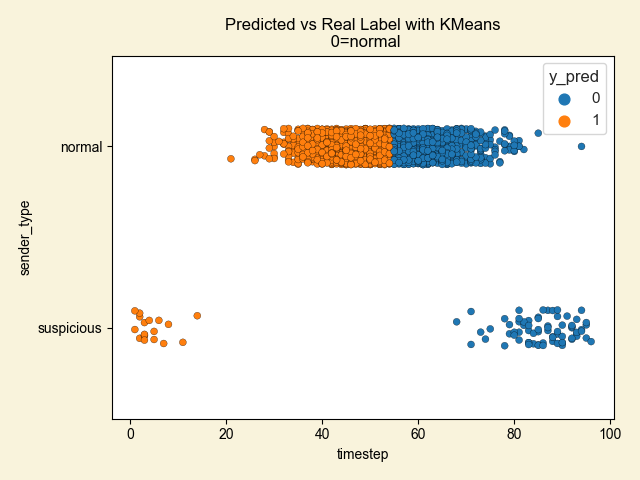

In [25]:
y_pred = KMeans(
        n_clusters=2
    ).fit_predict(X)

txns['y_pred'] = y_pred
colors = ['r' if label==0 else 'b' for label in y_pred]
fig, ax = plt.subplots()
np.random.seed(123)
sns.reset_defaults()
#sns.set_theme(palette='viridis')
sns.set_context('notebook')
#sns.set_context('talk')
sns.set_style('whitegrid')
#sns.set(rc={'axes.facecolor':'palegoldenrod', 'figure.facecolor':'white'})
sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', edgecolor='k', linewidth=.2)#, palette='')
fig.patch.set_facecolor('#F9F3DC')
#sns.violinplot(data=txns, x='timestep', y='sender_type', saturation=0.5)#, palette='')
#sns.kdeplot(data=txns, x='timestep',)
#sns.swarmplot(data=txns, x='timestep', y='sender_type', hue='y_pred')#, palette='')
#sns.boxplot(data=txns, x='timestep', y='sender_type', saturation=0.4)
plt.title('Predicted vs Real Label with KMeans\n 0=normal')
#sns.stripplot(X.flatten())
plt.tight_layout()
#clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
plt.show()

## isolation forest

In [26]:
print(txns.y_true.value_counts())
#print(txns.y_pred.value_counts())
(txns.y_pred!=1).value_counts()

0    1856
1      89
Name: y_true, dtype: int64


False    1056
True      889
Name: y_pred, dtype: int64

In [27]:
Xdeg2.shape

(1945, 2)

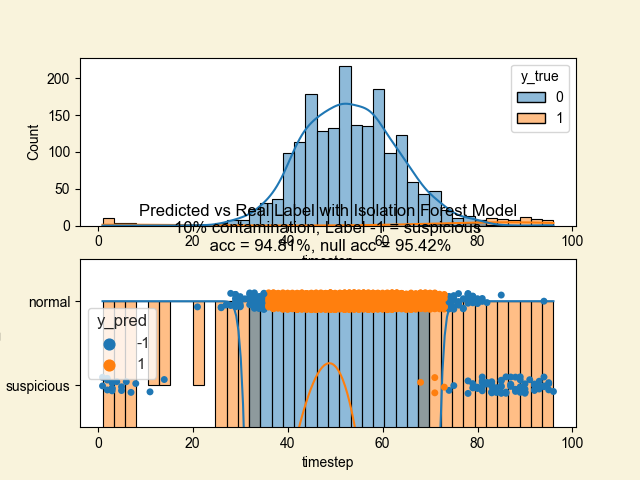

In [28]:
from sklearn.ensemble import IsolationForest
np.random.seed(123)
clf = IsolationForest(random_state=0, contamination=0.1).fit(Xdeg2)
y_pred = clf.predict(Xdeg2)
#y_pred = IsolationForest(random_state=0, contamination=0.1).fit_predict(X)

txns['y_pred'] = y_pred
null_acc = accuracy_score(txns.y_true, np.zeros(txns.y_true.shape[0])) # ytrue, ypred # predict all 0s (majority class)
null_acc = accuracy_score(txns.y_true, np.zeros(txns.y_true.shape[0])) # ytrue, ypred # predict all 0s (majority class)
acc = accuracy_score(txns.y_true, txns.y_pred==-1 )  # outlier is -1, wjhich is 1 in the other labeling
sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', )
plt.title(f'Predicted vs Real Label with Isolation Forest Model\n10% contamination, Label -1 = suspicious\n acc = {acc*100:.2f}%, null acc = {null_acc*100:.2f}%')
plt.show()

In [29]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [30]:
np.sum(np.abs(txns.y_true - (txns.y_pred==-1)))

101

In [31]:
txns
txns.y_true - np.zeros(txns.y_true.shape[0]) # ytrue, ypred # predict all 0s (majority class)
confusion = confusion_matrix(txns.y_true, np.zeros(txns.shape[0]))
tn, fp, fn, tp = confusion.flatten()
acc = (tp + tn) / (tp + tn + fp + fn)
print(acc)
confusion

0.954241645244216


array([[1856,    0],
       [  89,    0]])

In [124]:
confusion = confusion_matrix(txns.y_true, txns.y_pred==-1)
tn, fp, fn, tp = confusion.flatten() 
acc = (tp + tn) / (tp + tn + fp + fn)
print(acc)
confusion

0.9421188630490956


array([[1748,  111],
       [   1,   75]])

In [125]:
#print('[ isolation pred ]', classification_report(txns.y_true, txns.y_pred==-1))
#print('[ null case ]', classification_report(txns.y_true, np.zeros(txns.shape[0])))

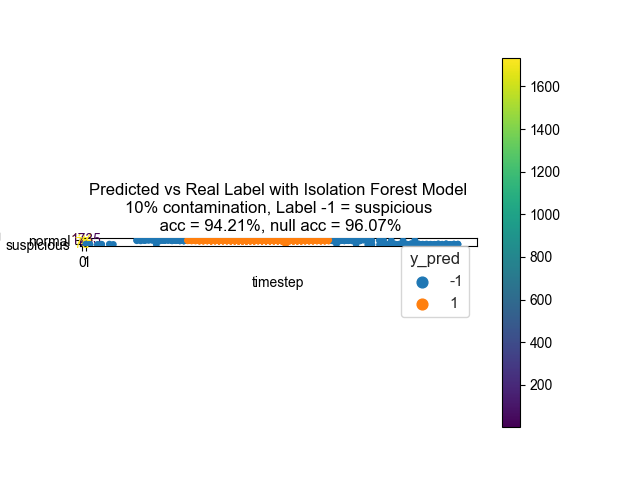

In [126]:
txns['y_pred'] = y_pred
np.random.seed(123)
null_acc = accuracy_score(txns.y_true, np.zeros(txns.y_true.shape[0])) # ytrue, ypred # predict all 0s (majority class)
acc = accuracy_score(txns.y_true, txns.y_pred==-1 )  # outlier is -1, wjhich is 1 in the other labeling
sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', )
plt.title(f'Predicted vs Real Label with Isolation Forest Model\n10% contamination, Label -1 = suspicious\n acc = {acc*100:.2f}%, null acc = {null_acc*100:.2f}%')
plt.show()

In [127]:
Xr = X.reshape(-1,1)
Xr

array([[35],
       [49],
       [61],
       ...,
       [87],
       [91],
       [95]])

In [128]:
# map[ 0,1 to 1, -1 
y_true = txns.y_true * -2 + 1

In [129]:
Xdeg2[:,0].shape

(1935,)

In [130]:
y_true

0       1
1       1
2       1
3       1
4       1
       ..
1930   -1
1931   -1
1932   -1
1933   -1
1934   -1
Name: y_true, Length: 1935, dtype: int64

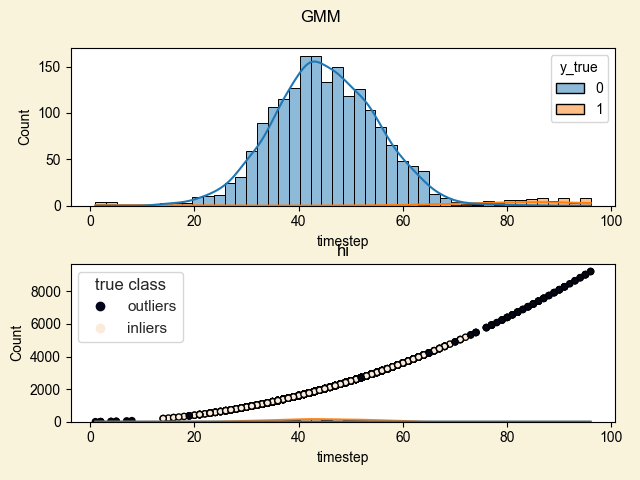

In [131]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

scatter = plt.scatter(Xdeg2[:, 0], Xdeg2[:, 1], c=y_true, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title('hi')
plt.show()

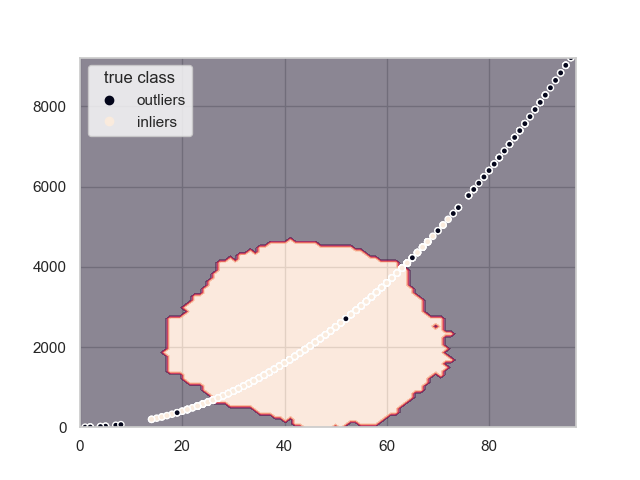

In [132]:
# The background color represents whether a sample in that given area is predicted to be an outlier or not. The scatter plot displays the true labels.
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    Xdeg2,
    response_method="predict",
    alpha=0.5,
)

disp.ax_.scatter(Xdeg2[:, 0], Xdeg2[:, 1], c=y_true, s=20, edgecolor="w")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
#disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
#plt.axis("square")
plt.show()


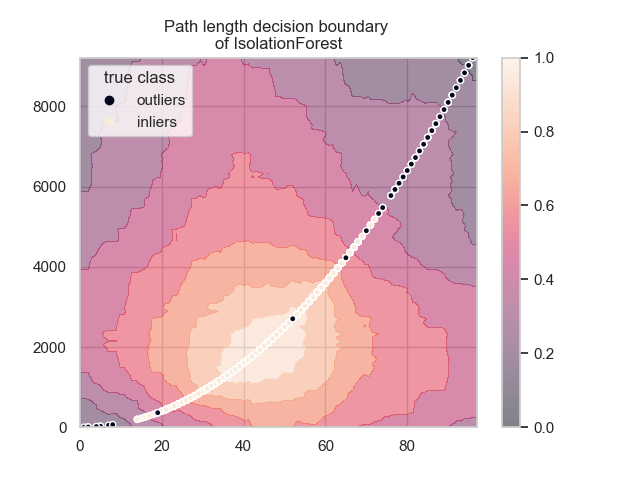

In [133]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html

# Plot path length decision boundary¶
# y setting the response_method="decision_function", the background of the DecisionBoundaryDisplay represents the measure of normality of an observation.
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    Xdeg2,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(Xdeg2[:, 0], Xdeg2[:, 1], c=y_true, s=20, edgecolor="w")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

In [134]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          -1       0.40      0.99      0.57        76
           1       1.00      0.94      0.97      1859

    accuracy                           0.94      1935
   macro avg       0.70      0.96      0.77      1935
weighted avg       0.98      0.94      0.95      1935



# classify using in/out degree features

In [135]:
# varying: small amounts late at night. uhm. other variations between sender / receiver
edges = pd.read_csv('nx_edges_list.csv')

In [136]:
edges

,nx_node_A,nx_node_B
0,1,622
1,1,842
2,1,1003
3,2,704
4,2,564
...,...,...
1930,1010,1004
1931,1010,1003
1932,1010,1003
1933,1010,1010


In [137]:
node_degs = pd.read_csv('tabular_graph_features.csv')

In [138]:
node_degs

,node_id,in_degree,out_degree
0,1,2,3
1,622,3,2
2,842,3,4
3,1003,23,4
4,2,2,3
...,...,...,...
1004,978,0,1
1005,979,0,1
1006,980,0,1
1007,982,0,1


# convert to by_id vs by_txns

In [139]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true,y_pred
0,35,2022-10-31 08:45:00,1,622,normal,-2570.593062,2022-10-31 08:45:00,0,1
1,49,2022-10-31 12:15:00,1,842,normal,-6018.117687,2022-10-31 12:15:00,0,1
2,61,2022-10-31 15:15:00,1,1003,normal,-2471.066399,2022-10-31 15:15:00,0,1
3,42,2022-10-31 10:30:00,2,704,normal,-2077.215731,2022-10-31 10:30:00,0,1
4,52,2022-10-31 13:00:00,2,564,normal,-3386.779747,2022-10-31 13:00:00,0,1
...,...,...,...,...,...,...,...,...,...
1930,80,2022-10-31 20:00:00,1010,1004,suspicious,-913.295141,2022-10-31 20:00:00,1,-1
1931,82,2022-10-31 20:30:00,1010,1003,suspicious,-606.674136,2022-10-31 20:30:00,1,-1
1932,87,2022-10-31 21:45:00,1010,1003,suspicious,-1367.083779,2022-10-31 21:45:00,1,-1
1933,91,2022-10-31 22:45:00,1010,1010,suspicious,-854.625186,2022-10-31 22:45:00,1,-1


In [140]:
true_agent_labels = pd.read_csv('agents_list.csv')
true_agent_labels.columns=['sender_id', 'true_sender_type']
true_agent_labels

,sender_id,true_sender_type
0,1,normal
1,2,normal
2,3,normal
3,4,normal
4,5,normal
...,...,...
992,1006,suspicious
993,1007,suspicious
994,1008,suspicious
995,1009,suspicious


In [141]:
txns.groupby(['sender_id'])[['sender_id', 'timestep', 'y_pred', 'y_true']].value_counts()

txns_by_id = txns[['sender_id' , 'timestep', 'y_pred', 'y_true']]
txns_by_id = txns_by_id.pivot(index='sender_id', columns='timestep', values='y_true')
txns_by_id

txns_by_id['sum'] = txns_by_id.sum()
txns_by_id.reset_index()[['sender_id', 'sum']].fillna(0) 
txns_by_id['agent_label'] = txns_by_id['sum'] >= 1
pred_by_agent = txns_by_id[['agent_label']] * 1 

In [142]:
true_agent_labels

,sender_id,true_sender_type
0,1,normal
1,2,normal
2,3,normal
3,4,normal
4,5,normal
...,...,...
992,1006,suspicious
993,1007,suspicious
994,1008,suspicious
995,1009,suspicious


In [143]:
true_agent_labels['true_label'] = true_agent_labels['true_sender_type'] != 'normal'  
# note that 0 = normal
true_agent_labels['true_label'] *= 1
true_agent_labels

,sender_id,true_sender_type,true_label
0,1,normal,0
1,2,normal,0
2,3,normal,0
3,4,normal,0
4,5,normal,0
...,...,...,...
992,1006,suspicious,1
993,1007,suspicious,1
994,1008,suspicious,1
995,1009,suspicious,1


# error analysis per agent

In [144]:
errors = pred_by_agent.reset_index().merge(true_agent_labels) 
errors['wrong_pred'] = errors.agent_label == errors.true_label
errors.wrong_pred.sum() / errors.shape[0]

0.9578736208625878

In [145]:
txns_by_id.sum() != 0

timestep
1              True
2              True
4              True
5              True
7              True
               ... 
94             True
95             True
96             True
sum            True
agent_label    True
Length: 90, dtype: bool

In [146]:
txns[txns.sender_id == 5]
txns.sender_id.unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   69,   70,   71,   72,   73,   74,   75,   76,   77,   78,
         79,   80,   81,   82,   83,   84,   85,   86,   87,   88,   89,
         90,   91,   92,   93,   94,   96,   97,   98,   99,  100,  101,
        102,  103,  104,  105,  106,  107,  109,  110,  111,  112,  113,
        114,  115,  116,  117,  118,  119,  120,  121,  122,  123,  124,
        126,  127,  128,  129,  130,  131,  132,  133,  134,  135,  136,
        137,  138,  139,  140,  141,  142,  143,  144,  145,  146,  147,
        148,  149,  150,  151,  152,  153,  154,  1

In [147]:
sender_info = pd.DataFrame(txns.sender_id.unique(), columns=['sender_id'])
sender_info

,sender_id
0,1
1,2
2,3
3,4
4,5
...,...
992,1006
993,1007
994,1008
995,1009


In [148]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true,y_pred
0,35,2022-10-31 08:45:00,1,622,normal,-2570.593062,2022-10-31 08:45:00,0,1
1,49,2022-10-31 12:15:00,1,842,normal,-6018.117687,2022-10-31 12:15:00,0,1
2,61,2022-10-31 15:15:00,1,1003,normal,-2471.066399,2022-10-31 15:15:00,0,1
3,42,2022-10-31 10:30:00,2,704,normal,-2077.215731,2022-10-31 10:30:00,0,1
4,52,2022-10-31 13:00:00,2,564,normal,-3386.779747,2022-10-31 13:00:00,0,1
...,...,...,...,...,...,...,...,...,...
1930,80,2022-10-31 20:00:00,1010,1004,suspicious,-913.295141,2022-10-31 20:00:00,1,-1
1931,82,2022-10-31 20:30:00,1010,1003,suspicious,-606.674136,2022-10-31 20:30:00,1,-1
1932,87,2022-10-31 21:45:00,1010,1003,suspicious,-1367.083779,2022-10-31 21:45:00,1,-1
1933,91,2022-10-31 22:45:00,1010,1010,suspicious,-854.625186,2022-10-31 22:45:00,1,-1


# try to extract timesteps again; just do loop 

In [149]:
sender_info['txns'] = None
sender_info['txn_mean_time'] = None
# convert datatype to numpy array
sender_info.txns = sender_info.txns.astype(object)
display(sender_info.sample())

all_my_txns = []
#for id in [1,2]:
for id in sender_info.sender_id:
    my_txns = txns[txns.sender_id == id].timestep
    #print(my_txns.to_list())
    all_my_txns.append(my_txns.to_list())
sender_info['txns'] = pd.Series(all_my_txns)
display(sender_info.iloc[1])
sender_info['txn_mean_time'] = sender_info['txns'].apply(np.mean)
#sender_info['label_by_mean_txn_time'] = 
sender_info


,sender_id,txns,txn_mean_time
281,286,None,None


sender_id                   2
txns             [42, 52, 56]
txn_mean_time            None
Name: 1, dtype: object

,sender_id,txns,txn_mean_time
0,1,"[35, 49, 61]",48.333333
1,2,"[42, 52, 56]",50.000000
2,3,"[35, 43, 52]",43.333333
3,4,[49],49.000000
4,5,[38],38.000000
...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000


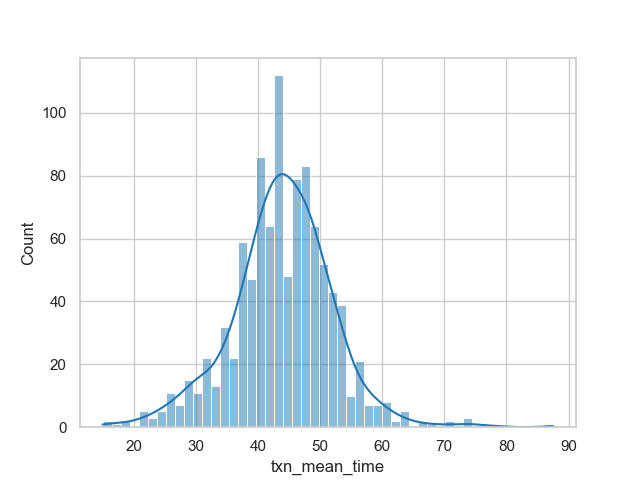

In [150]:
fig, ax = plt.subplots()
plt.set_xlim = [0,100]
sns.histplot(sender_info['txn_mean_time'], ax=ax, kde=True , bins=50)
#sns.kdeplot(sender_info['txn_mean_time'], ax=ax)
plt.show()

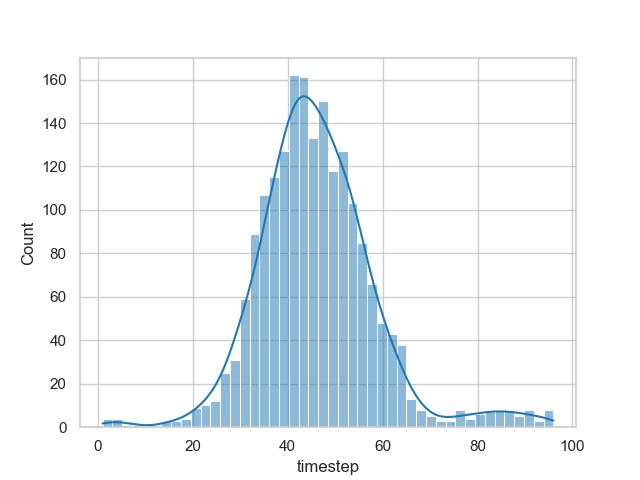

In [151]:
plt.subplots()
plt.xlim = [0,100]
sns.histplot(txns.timestep, kde=True)
plt.show()

In [152]:
true_agent_labels.sample()

,sender_id,true_sender_type,true_label
962,976,normal,0


In [153]:
sender_info = sender_info.merge(true_agent_labels)

In [154]:
sns.stripplot(sender_info['txn_mean_time'],)#, type=)
sns.histplot(sender_info['txn_mean_time'])#, type=)

/Users/owls/v3/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Simulated Transaction Times by Sender Type\nPredicted vs Real Label with Gaussian Mixture Model'}, xlabel='txn_mean_time', ylabel='Real Sender Type'>

In [155]:
sender_info

,sender_id,txns,txn_mean_time,true_sender_type,true_label
0,1,"[35, 49, 61]",48.333333,normal,0
1,2,"[42, 52, 56]",50.000000,normal,0
2,3,"[35, 43, 52]",43.333333,normal,0
3,4,[49],49.000000,normal,0
4,5,[38],38.000000,normal,0
...,...,...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429,suspicious,1
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444,suspicious,1
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444,suspicious,1
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000,suspicious,1


# plot with true hue 

In [156]:
sns.histplot(data=sender_info, x='txn_mean_time', hue='true_sender_type')

<AxesSubplot:title={'center':'Simulated Transaction Times by Sender Type\nPredicted vs Real Label with Gaussian Mixture Model'}, xlabel='txn_mean_time', ylabel='Real Sender Type'>

# create in / out degree table

In [157]:
node_degs.columns=['sender_id', 'in_degree', 'out_degree']
node_degs

,sender_id,in_degree,out_degree
0,1,2,3
1,622,3,2
2,842,3,4
3,1003,23,4
4,2,2,3
...,...,...,...
1004,978,0,1
1005,979,0,1
1006,980,0,1
1007,982,0,1


In [158]:
sender_info = sender_info.merge(node_degs)
sender_info

,sender_id,txns,txn_mean_time,true_sender_type,true_label,in_degree,out_degree
0,1,"[35, 49, 61]",48.333333,normal,0,2,3
1,2,"[42, 52, 56]",50.000000,normal,0,2,3
2,3,"[35, 43, 52]",43.333333,normal,0,4,3
3,4,[49],49.000000,normal,0,1,1
4,5,[38],38.000000,normal,0,0,1
...,...,...,...,...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429,suspicious,1,17,7
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444,suspicious,1,18,8
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444,suspicious,1,15,8
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000,suspicious,1,18,7


# kmeans  / isolation forest classification

In [163]:
sender_info['y_pred_type'] = sender_info.true_label.apply(lambda x: 'normal' if x == 1 else 'suspicious')
sender_info #WARNING

,sender_id,txns,txn_mean_time,true_sender_type,true_label,in_degree,out_degree,y_pred_type
0,1,"[35, 49, 61]",48.333333,normal,0,2,3,suspicious
1,2,"[42, 52, 56]",50.000000,normal,0,2,3,suspicious
2,3,"[35, 43, 52]",43.333333,normal,0,4,3,suspicious
3,4,[49],49.000000,normal,0,1,1,suspicious
4,5,[38],38.000000,normal,0,0,1,suspicious
...,...,...,...,...,...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429,suspicious,1,17,7,normal
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444,suspicious,1,18,8,normal
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444,suspicious,1,15,8,normal
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000,suspicious,1,18,7,normal


In [ ]:
X = sender_info[['txn_mean_time' , 'in_degree', 'out_degree']]
# DEFINITELY don't leave sender id in there

#y_pred = KMeans(
        #n_clusters=2
    #).fit_predict(X)
#
np.random.seed(123)
y_pred = IsolationForest(random_state=0, contamination=0.1).fit_predict(X)
sender_info['y_pred'] = y_pred
colors = ['r' if label==0 else 'b' for label in y_pred]
#-- plot disaggregated by prediction (vs true) 
#plt.subplots()
#sns.stripplot(data=sender_info, x='txn_mean_time', 
#    y='y_pred_type', hue='true_sender_type', )

#-- plot disaggregated by true label 
plt.subplots()
sns.stripplot(data=sender_info, x='txn_mean_time', y='true_sender_type', hue='y_pred_type', )
plt.title('Predicted vs Real Label with Isolation Forest\n Including In/Out degree features')

plt.show()

In [164]:
sender_info[sender_info.true_label == 1][['out_degree']].value_counts()
sender_info[sender_info.true_label == 0][['out_degree']].value_counts()
#sender_info[sender_info.true_label == 1].in_degree.value_counts()

out_degree
1             421
2             339
3             164
4              51
5              10
6               2
dtype: int64

In [165]:
sns.pairplot(sender_info[['txn_mean_time', 'in_degree', 'out_degree']])

In [166]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true,y_pred
0,35,2022-10-31 08:45:00,1,622,normal,-2570.593062,2022-10-31 08:45:00,0,1
1,49,2022-10-31 12:15:00,1,842,normal,-6018.117687,2022-10-31 12:15:00,0,1
2,61,2022-10-31 15:15:00,1,1003,normal,-2471.066399,2022-10-31 15:15:00,0,1
3,42,2022-10-31 10:30:00,2,704,normal,-2077.215731,2022-10-31 10:30:00,0,1
4,52,2022-10-31 13:00:00,2,564,normal,-3386.779747,2022-10-31 13:00:00,0,1
...,...,...,...,...,...,...,...,...,...
1930,80,2022-10-31 20:00:00,1010,1004,suspicious,-913.295141,2022-10-31 20:00:00,1,-1
1931,82,2022-10-31 20:30:00,1010,1003,suspicious,-606.674136,2022-10-31 20:30:00,1,-1
1932,87,2022-10-31 21:45:00,1010,1003,suspicious,-1367.083779,2022-10-31 21:45:00,1,-1
1933,91,2022-10-31 22:45:00,1010,1010,suspicious,-854.625186,2022-10-31 22:45:00,1,-1


In [167]:
txns[(txns.sender_id == 1)].timestep.mean()

48.333333333333336

In [168]:
sender_info.txn_mean_time

0      48.333333
1      50.000000
2      43.333333
3      49.000000
4      38.000000
         ...    
992    87.571429
993    74.444444
994    70.444444
995    66.375000
996    73.833333
Name: txn_mean_time, Length: 997, dtype: float64

# test same distribution with Kolmogorov-Smirnov test

In [169]:
from scipy.stats import ks_2samp
ks_2samp(sender_info.txn_mean_time, sender_info.txn_mean_time)

KstestResult(statistic=0.0, pvalue=1.0)

In [170]:
from sklearn import preprocessing 

sns.histplot(preprocessing.normalize(
    txns.timestep.to_numpy().reshape(-1,1)
    ))
sns.displot(txns.timestep.to_numpy().reshape(-1,1))

In [171]:
from scipy.stats import ks_2samp
ks_2samp(
    preprocessing.normalize(
        sender_info.txn_mean_time.to_numpy().reshape(-1,1),
    ),
    preprocessing.normalize(
        txns.timestep.to_numpy().reshape(-1,1)
        )
    )
# Since the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the two sample datasets do not come from the same distribution.

ValueError: object too deep for desired array

# decision tree

In [172]:
X[:,0]

array([35, 49, 61, ..., 87, 91, 95])

In [173]:
agent_based_model.Utility.timestep_to_time(77.5)

datetime.datetime(2022, 10, 31, 19, 22, 30)

In [1]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, txns.y_true)

NameError: name 'X' is not defined

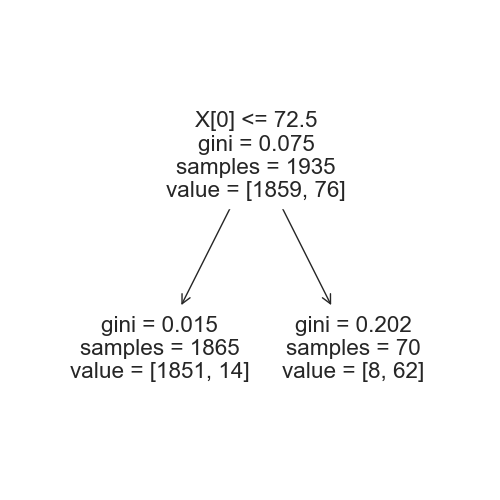

In [ ]:
plt.figure(figsize=(5,5))
tree.plot_tree(clf)
plt.show()